In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/training',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 1400 images belonging to 3 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/validation',target_size=(225,225),batch_size=32,class_mode='categorical',shuffle=False)

Found 135 images belonging to 3 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32,3,3,input_shape=(225,225,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,3,3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [7]:
mc = ModelCheckpoint('lenet.h5', monitor = 'accuracy', verbose=1, save_best_only = True)

In [8]:
epochs = 30
batch_size = 32

In [9]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks= [mc])

Epoch 1/30
43/43 [==============================] - ETA: 0s - loss: 1.0872 - accuracy: 0.4371
Epoch 1: accuracy improved from -inf to 0.43713, saving model to lenet.h5
43/43 [==============================] - 55s 1s/step - loss: 1.0872 - accuracy: 0.4371 - val_loss: 0.9533 - val_accuracy: 0.4688
Epoch 2/30
43/43 [==============================] - ETA: 0s - loss: 0.8330 - accuracy: 0.6089
Epoch 2: accuracy improved from 0.43713 to 0.60892, saving model to lenet.h5
43/43 [==============================] - 37s 872ms/step - loss: 0.8330 - accuracy: 0.6089 - val_loss: 0.7155 - val_accuracy: 0.7266
Epoch 3/30
43/43 [==============================] - ETA: 0s - loss: 0.7592 - accuracy: 0.6550
Epoch 3: accuracy improved from 0.60892 to 0.65497, saving model to lenet.h5
43/43 [==============================] - 38s 879ms/step - loss: 0.7592 - accuracy: 0.6550 - val_loss: 0.6038 - val_accuracy: 0.7734
Epoch 4/30
43/43 [==============================] - ETA: 0s - loss: 0.6291 - accuracy: 0.7244
Epo

Epoch 29/30
43/43 [==============================] - ETA: 0s - loss: 0.1854 - accuracy: 0.9291
Epoch 29: accuracy did not improve from 0.93275
43/43 [==============================] - 37s 874ms/step - loss: 0.1854 - accuracy: 0.9291 - val_loss: 0.2105 - val_accuracy: 0.9219
Epoch 30/30
43/43 [==============================] - ETA: 0s - loss: 0.1693 - accuracy: 0.9371
Epoch 30: accuracy improved from 0.93275 to 0.93713, saving model to lenet.h5
43/43 [==============================] - 38s 874ms/step - loss: 0.1693 - accuracy: 0.9371 - val_loss: 0.5523 - val_accuracy: 0.8516


In [18]:
import numpy as np

predictions = model.predict_generator(test_set)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [19]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [20]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

         CNV       0.94      0.62      0.75       101
         DME       0.68      0.82      0.75        84
      DRUSEN       0.66      0.81      0.72        67
      NORMAL       0.83      0.85      0.84        80

    accuracy                           0.77       332
   macro avg       0.78      0.78      0.77       332
weighted avg       0.79      0.77      0.77       332



In [21]:
from sklearn import metrics
cm = metrics.confusion_matrix(true_classes, predicted_classes)
print(cm) 

[[63 23 12  3]
 [ 2 69  8  5]
 [ 2  5 54  6]
 [ 0  4  8 68]]


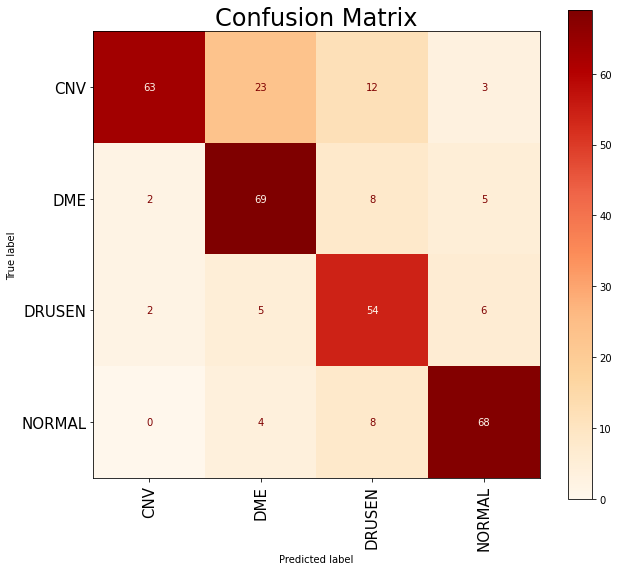

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize'] = (10.0, 9.0)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=class_labels)
display_c_m.plot(cmap='OrRd', xticks_rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()

In [23]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

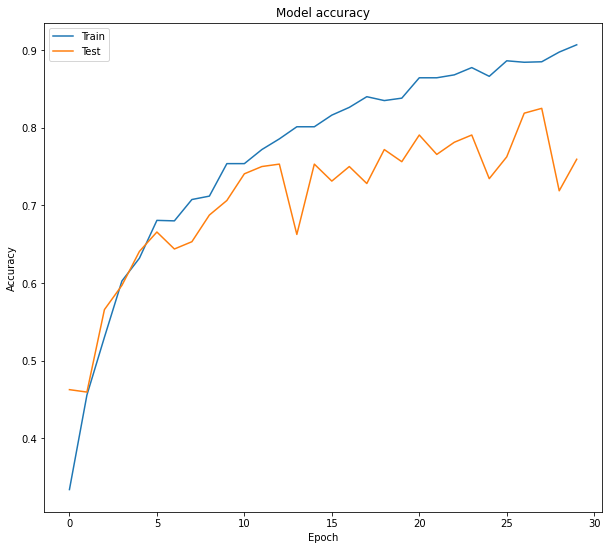

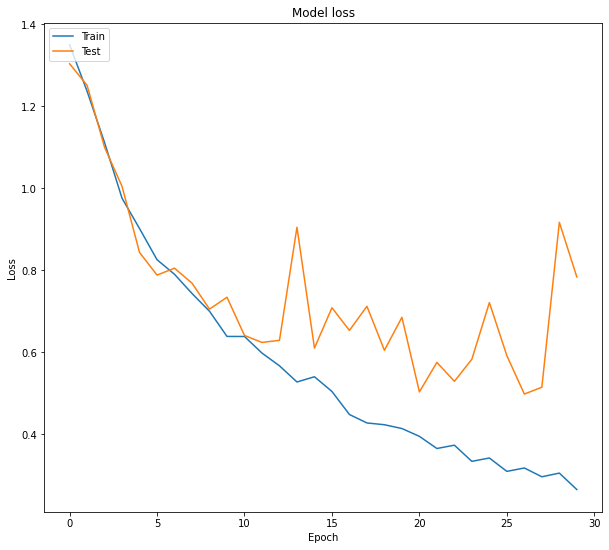

In [24]:
graph()